<h1 align="center">Voltamperometría cíclica y espectros de capacitancia electroquímica del par redox Ferrocianuro (Fe<sup>2+</sup>) 4 mM / Ferricianuro (Fe<sup>3+</sup>) 4 mM en un electrolito soporte de KCl 1M</h1>

<div align="right">David A. Miranda, PhD<br>2024</div>

## 1. Importar librerías

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## 2. Planteamiento del problema

Dada una solución electrolítica acuosa que contiene ferrocianuro y ferrocenil, utilizando KCl como electrolito soporte, con concentraciones de 4 mM de $ K_4[Fe(CN)_6]\cdot3H_2O $, 4 mM de $ K_3[Fe(CN)_6] $ y 1 M de KCl, obtenga la voltamperometría cíclica y los espectros de capacitancia electroquímica.

## 3. Voltamperometría Cíclica

In [22]:
cv_file_name = '../data/parRedox/CV_fe+3_fe+2_-0.3_0.8_OCP_0.280.txt'
cv = pd.read_csv(cv_file_name, sep=';')
cv

,Potential applied (V),Time (s),WE(1).Current (A),Scan,Index,WE(1).Potential (V)
0,0.283051,19.574414,0.000001,1,1,0.285034
1,0.286102,19.604932,0.000010,1,2,0.288239
2,0.289154,19.635450,0.000016,1,3,0.289612
3,0.292206,19.665968,0.000020,1,4,0.292786
4,0.295258,19.696486,0.000022,1,5,0.295837
...,...,...,...,...,...,...
2167,0.267792,85.706920,0.000044,3,2168,0.268829
2168,0.270844,85.737438,0.000047,3,2169,0.271973
2169,0.273895,85.767956,0.000050,3,2170,0.275024
2170,0.276947,85.798474,0.000053,3,2171,0.278107


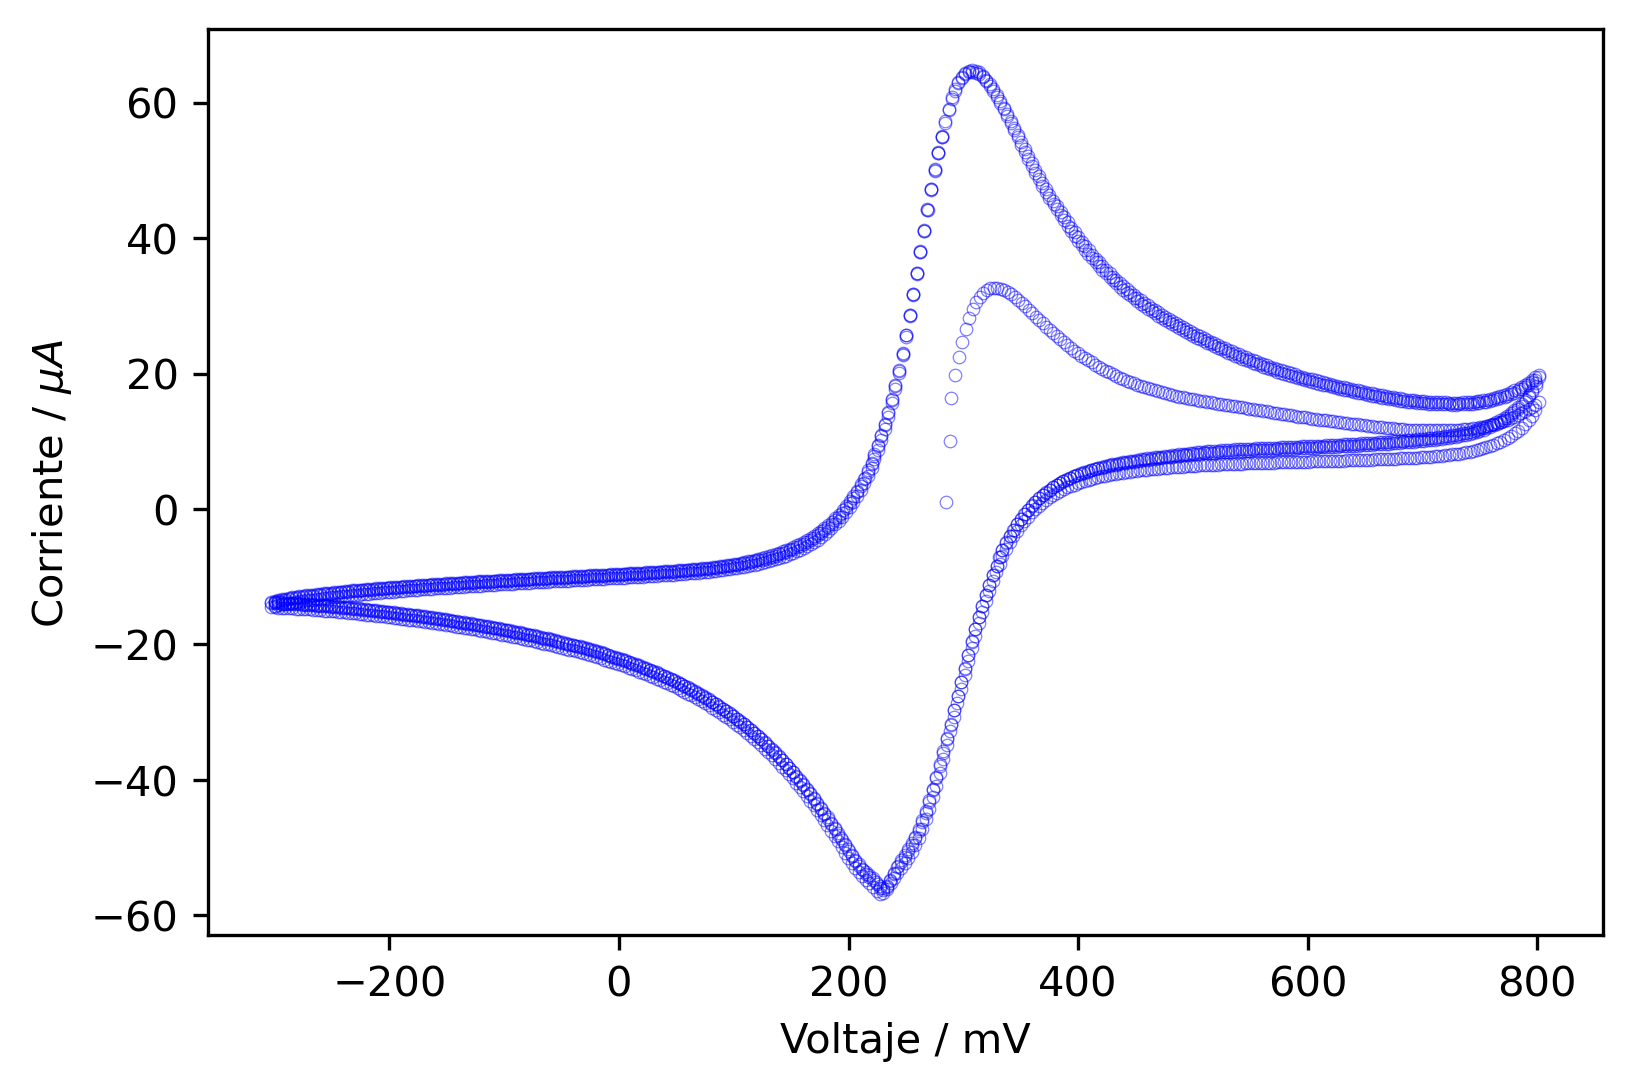

In [93]:
I = 1e6 * cv['WE(1).Current (A)']
V = 1e3 * cv['WE(1).Potential (V)']

plt.figure(dpi=300)
plt.plot(V, I, '.b', fillstyle='none', alpha=0.5, markeredgewidth=0.3)
plt.xlabel('Voltaje / mV')
_ = plt.ylabel(r'Corriente / $\mu A$')

## 4. Espectroscopía de Capacitancia Electroquímica

In [ ]:
eis = {
    'ocp':0.28,
    'V': np.array([-0.1, 0.23, 0.28, 0.31, 0.60]),
    -0.1:{
        'file_name':'../data/parRedox/EIS_fe+3_fe+2_phi_-0.10.txt',
    },
    0.23:{
        'file_name':'../data/parRedox/EIS_fe+3_fe+2_phi_0.23.txt',
    },
    0.28:{
        'file_name':'../data/parRedox/EIS_fe+3_fe+2_phi_0.28.txt',
    },
    0.31:{
        'file_name':'../data/parRedox/EIS_fe+3_fe+2_phi_0.31.txt',
    },
    0.60:{
        'file_name':'../data/parRedox/EIS_fe+3_fe+2_phi_0.60.txt',
    },
}
markers = ['<', 's', 'o', 's', '>']
colors  = ['b', 'm', 'k', 'r', 'c']
ocp = eis['ocp']
eis['phi'] = eis['V'] - eis['ocp']

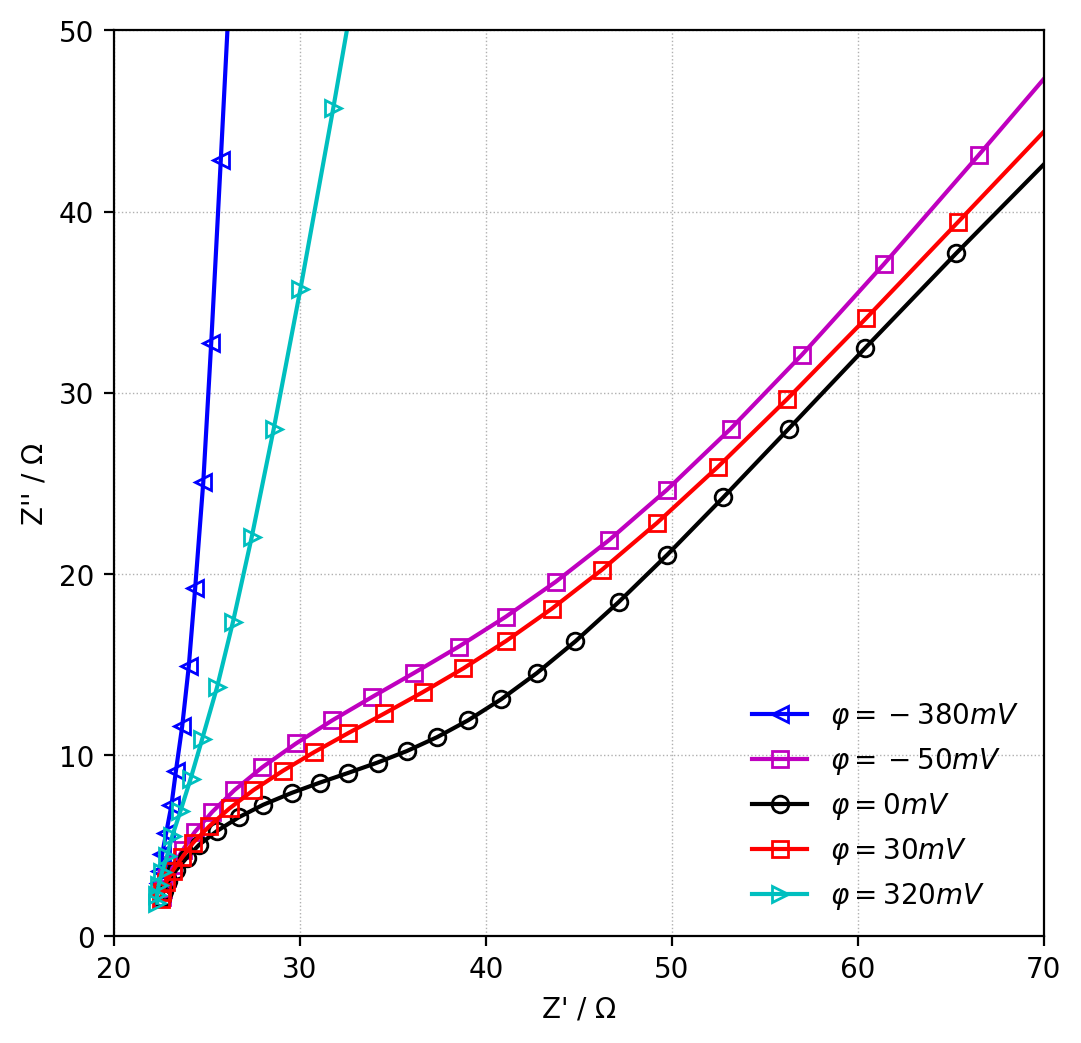

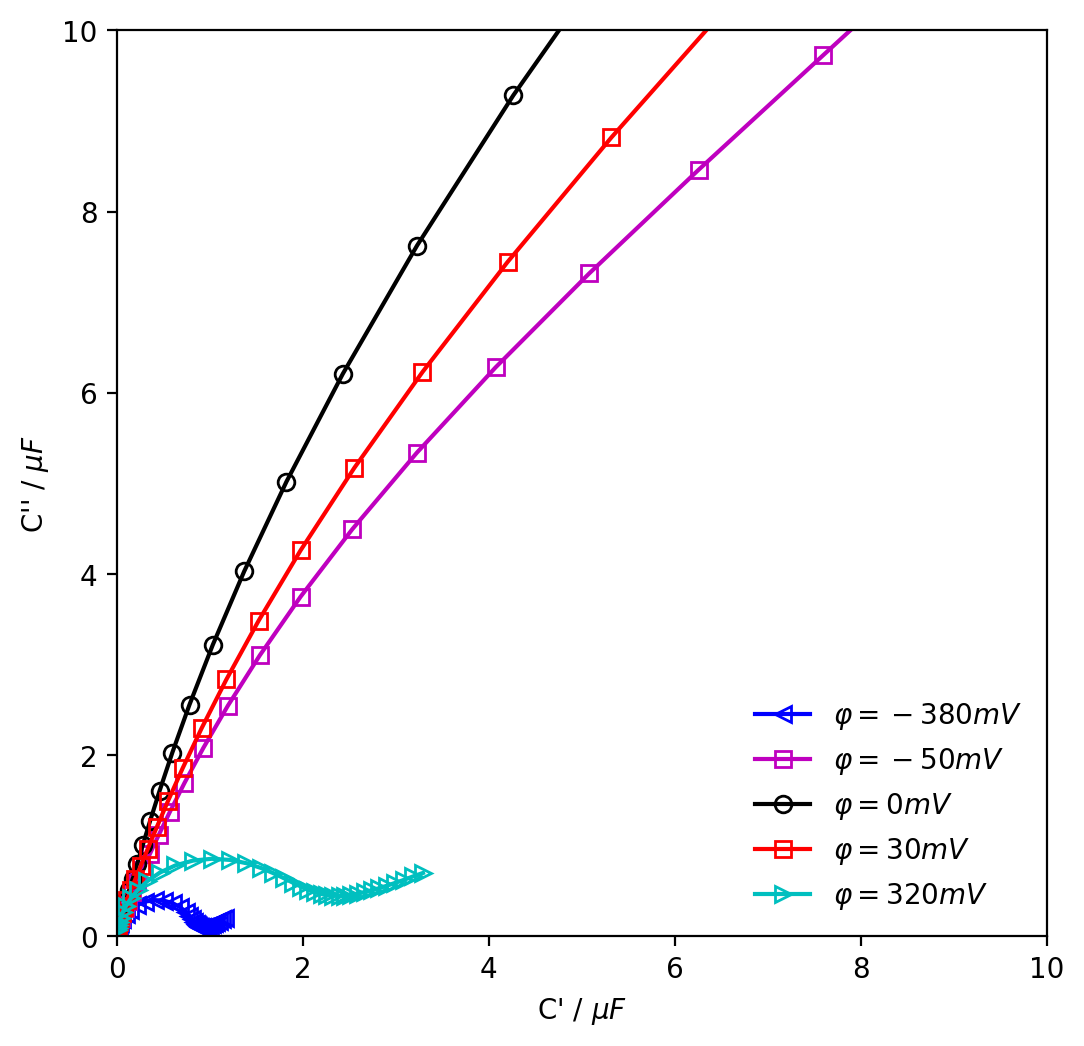

In [84]:
fig_Z = plt.figure(dpi=200, figsize=(6, 6))
fig_C = plt.figure(dpi=200, figsize=(6, 6))
for i, v in enumerate(eis['V']):
    file_name = eis[v]['file_name']
    df = pd.read_csv(file_name, sep=';')
    freq = df["Frequency (Hz)"].to_numpy()
    Zr = df["Z' (Ω)"].to_numpy()
    Zi = df["-Z'' (Ω)"].to_numpy()
    Z = Zr - 1j*Zi
    freq = freq[np.abs(Z) < 20e3]
    Z = Z[np.abs(Z) < 20e3]
    C = 1e6 / ( 2j * np.pi * freq * Z )
    eis[v]['Frequency (Hz)'] = freq
    eis[v]['Capacitance (uF)'] = C
    plt.figure(fig_Z)
    plt.plot(Z.real, -Z.imag, marker=markers[i], color=colors[i], fillstyle='none',
            label=rf'$\varphi = {1e3*(v-ocp):0.0f} mV$')
    plt.figure(fig_C)
    plt.plot(C.real, -C.imag, marker=markers[i], color=colors[i], fillstyle='none',
            label=rf'$\varphi = {1e3*(v-ocp):0.0f} mV$')
plt.figure(fig_Z)
plt.xlim(20, 70)
plt.ylim(0, 50)
plt.legend(frameon=False)
plt.grid(linestyle='dotted', linewidth=0.5)
plt.xlabel(r"Z' / $\Omega$")
_ = plt.ylabel(r"Z'' / $\Omega$")

plt.figure(fig_C)
plt.legend(frameon=False)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel(r"C' / $\mu F$")
_ = plt.ylabel(r"C'' / $\mu F$")

## 5. Preguntas de autoexplicación

### 5.1. Primer bloque de preguntas

5.1.1. Describa cómo se realizaron las mediciones para la voltamperometría cíclica.

5.1.2. En los datos experimentales de voltamperometría cíclica, para cada valor de potencial se observan dos posibles valores de corriente, ¿cómo están relacionados? Argumente su respuesta.

5.1.3. En la cronovoltamperometría se observan curvas superpuestas, ¿cuál es la razón de ello?

5.1.4. En términos de los procesos de oxidación y reducción que tienen lugar en la interfase electrodo/solución, interprete la cronovoltamperometría.

5.1.5. ¿Qué es el potencial de media onda y cómo se relaciona con el voltaje de circuito abierto? Argumente su respuesta.

### 5.2. Segundo bloque de preguntas

5.2.1. Describa cómo se realizaron las mediciones para la espectroscopía de capacitancia electroquímica.

5.2.2. Describa cómo se graficaron los datos experimentales.

5.2.3. En el diagrama de Nyquist para la impedancia eléctrica, ¿se observan valores de impedancia asociados a difusión? De ser así:

(a) Describa bajo qué condiciones se observa el proceso de difusión.

(b) Si no se observa en todas las curvas, explique por qué se observa este fenómeno en unos datos y no en otros.

(c) En los datos donde se observan procesos de difusión, explique por qué hay frecuencias para las cuales dicho proceso domina sobre otros.

(d) Además de la difusión, ¿qué otros procesos espera observar en la solución electrolítica que se puedan observar en los datos experimentales?

5.2.4. En el diagrama de Nyquist para la capacitancia se observan dos semicírculos bien definidos. ¿Los semicírculos se pueden asociar a la doble capa electrolítica o a procesos de óxido-reducción en la superficie del electrodo de trabajo? Argumente su respuesta.

5.2.5. Obtenga los diagramas de Bode tanto para impedancia como para capacitancia e interprételos.

**Lecturas sugeridas**
+ Noémie Elgrishi et al. *A Practical Beginner’s Guide to Cyclic Voltammetry*: [J. Chem. Educ. 2018, 95, 2, 197–206](https://pubs.acs.org/doi/10.1021/acs.jchemed.7b00361)
+ Peter T. Kissinger and William R. Heineman. *Cyclic voltammetry*: [J. Chem. Educ. 1983, 60, 9, 702](http://dx.doi.org/10.1021/ed060p702)
+ Lida Khalafi et al. *Why Is Voltammetric Current Scan Rate Dependent? Representation of a Mathematically Dense Concept Using Conceptual Thinking*: [J. Chem. Educ. 2021, 98, 3957−3961](https://pubs.acs.org/doi/10.1021/acs.jchemed.1c00770)
+ Bing-Ang Mei et al. *Physical Interpretations of Nyquist Plots for EDLC Electrodes and Devices*: [J. Phys. Chem. C 2018, 122, 194−206](https://pubs.acs.org/doi/10.1021/acs.jpcc.7b10582)

End!